In [2]:
import nltk

In [3]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\aanishsingla\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection') ]

In [8]:
messages[11]

'spam\tSIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [9]:
import pandas as pd
import numpy as np

In [10]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t', names=['label','msg'])

In [11]:
messages.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
msg      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [13]:
messages.describe()

,label,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('label').describe()

msg                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [15]:
messages['length'] = messages['msg'].apply(len)

In [21]:
import seaborn as sns
%matplotlib inline

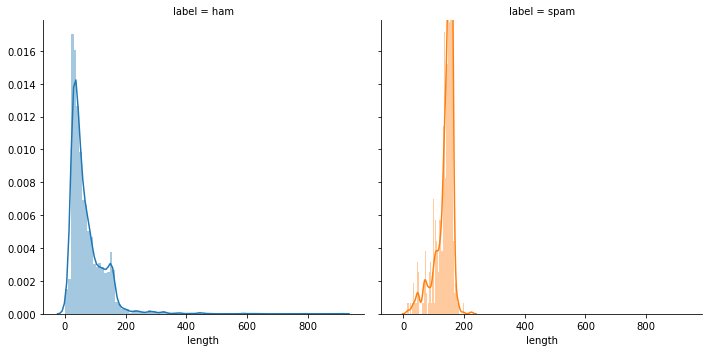

In [35]:
g=sns.FacetGrid(data=messages,hue="label",size=5,col="label")
g.map(sns.distplot,"length", bins=100)
#sns.distplot(messages['length'],color=messages['label'])

In [36]:
import string

In [47]:
mess = "Hi! I am here. The ball is there."

In [48]:
nopunct = [c for c in mess if c not in string.punctuation]

In [49]:
print(''.join(nopunct))

Hi I am here The ball is there


In [50]:
from nltk.corpus import stopwords

In [54]:
clean_mess = [c for c in ''.join(nopunct).split(" ") if c.lower() not in stopwords.words('English') ] 
clean_mess

['Hi', 'ball']

In [55]:
def text_process(mess):
    """
    1. Remove Punctuations
    2. Remove Stop words
    """
    nopunct = [c for c in mess if c not in string.punctuation]
    return [word for word in ''.join(nopunct).split(" ") if word.lower() not in stopwords.words('English') ]

In [60]:
#Tokenization
processed_msg=messages['msg'].apply(text_process)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [62]:
processed_msg.tail()

5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                   [Pity, , mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: msg, dtype: object

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['msg'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [66]:
#Count of unique words in the corpus
print(len(bow_transformer.vocabulary_))

11427


In [68]:
#Term Frequency
tx_text=bow_transformer.transform(messages['msg'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [91]:
print(tx_text[2])

  (0, 74)	1
  (0, 424)	1
  (0, 431)	1
  (0, 444)	1
  (0, 872)	1
  (0, 1552)	1
  (0, 1834)	2
  (0, 1942)	1
  (0, 2805)	1
  (0, 3954)	1
  (0, 4732)	1
  (0, 5620)	1
  (0, 6332)	2
  (0, 6558)	1
  (0, 9161)	1
  (0, 9202)	1
  (0, 9254)	1
  (0, 10514)	1
  (0, 10688)	1
  (0, 11086)	1
  (0, 11125)	1


In [76]:
bow_transformer.get_feature_names()[1484]

'Cine'

In [75]:
messages['msg'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [77]:
print(tx_text.shape)

(5572, 11427)


In [78]:
#Non zeros in sparse matrix
tx_text.nnz

51591

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
tfidf_tx = TfidfTransformer().fit(tx_text)

In [92]:
#Term Freq Inverse Document Freq of all the messages 
tfidf_all = tfidf_tx.transform(tx_text)

In [93]:
print(tfidf_all.shape)

(5572, 11427)


In [94]:
#Inverse Doc Freq of a given word
tfidf_tx.idf_[bow_transformer.vocabulary_['city']]

8.9325416070095898

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
spam_model = MultinomialNB().fit(tfidf_all, messages['label'])

In [109]:
pred = spam_model.predict(tfidf_all)

'ham'

In [103]:
from sklearn.metrics import confusion_matrix

In [122]:
print(confusion_matrix(pred,messages['label']))

[[4825  116]
 [   0  631]]


In [123]:
#Using Pipelines
from sklearn.pipeline import Pipeline 

In [125]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier' ,MultinomialNB())
])

In [126]:
pipeline.fit(messages['msg'], messages['label'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000000011D26EB8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [127]:
pred_pipe = pipeline.predict(messages['msg'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [128]:
from sklearn.metrics import classification_report

In [129]:
print(classification_report(pred_pipe, messages['label']))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99      4941
       spam       0.84      1.00      0.92       631

avg / total       0.98      0.98      0.98      5572

